# K-Means Clustering

## Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [3]:
df = pd.read_csv('../Resource/College.csv')

## Exploratory data analysis

In [4]:
df.shape

(777, 19)

In [5]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [7]:
df.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [8]:
df.drop(['S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   777 non-null    object
 1   Private      777 non-null    object
 2   Apps         777 non-null    int64 
 3   Accept       777 non-null    int64 
 4   Enroll       777 non-null    int64 
 5   Top10perc    777 non-null    int64 
 6   Top25perc    777 non-null    int64 
 7   F.Undergrad  777 non-null    int64 
 8   P.Undergrad  777 non-null    int64 
 9   Outstate     777 non-null    int64 
 10  Room.Board   777 non-null    int64 
 11  Books        777 non-null    int64 
 12  Personal     777 non-null    int64 
 13  PhD          777 non-null    int64 
 14  Terminal     777 non-null    int64 
dtypes: int64(13), object(2)
memory usage: 91.2+ KB


In [10]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000


In [11]:
df['Unnamed: 0'].unique()

array(['Abilene Christian University', 'Adelphi University',
       'Adrian College', 'Agnes Scott College',
       'Alaska Pacific University', 'Albertson College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alderson-Broaddus College', 'Alfred University',
       'Allegheny College', 'Allentown Coll. of St. Francis de Sales',
       'Alma College', 'Alverno College',
       'American International College', 'Amherst College',
       'Anderson University', 'Andrews University',
       'Angelo State University', 'Antioch University',
       'Appalachian State University', 'Aquinas College',
       'Arizona State University Main campus',
       'Arkansas College (Lyon College)', 'Arkansas Tech University',
       'Assumption College', 'Auburn University-Main Campus',
       'Augsburg College', 'Augustana College IL', 'Augustana College',
       'Austin College', 'Averett College', 'Baker University',
       'Baldwin-Wallace College', 'Barat College', 

In [12]:
len(df['Unnamed: 0'].unique())

777

In [13]:
df['Private'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
len(df['Private'].unique())

2

In [15]:
df.drop(['Private'], axis=1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   777 non-null    object
 1   Apps         777 non-null    int64 
 2   Accept       777 non-null    int64 
 3   Enroll       777 non-null    int64 
 4   Top10perc    777 non-null    int64 
 5   Top25perc    777 non-null    int64 
 6   F.Undergrad  777 non-null    int64 
 7   P.Undergrad  777 non-null    int64 
 8   Outstate     777 non-null    int64 
 9   Room.Board   777 non-null    int64 
 10  Books        777 non-null    int64 
 11  Personal     777 non-null    int64 
 12  PhD          777 non-null    int64 
 13  Terminal     777 non-null    int64 
dtypes: int64(13), object(1)
memory usage: 85.1+ KB


In [17]:
df.head()

,Unnamed: 0,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72


Text(0.5, 1.0, 'LIVE Download')

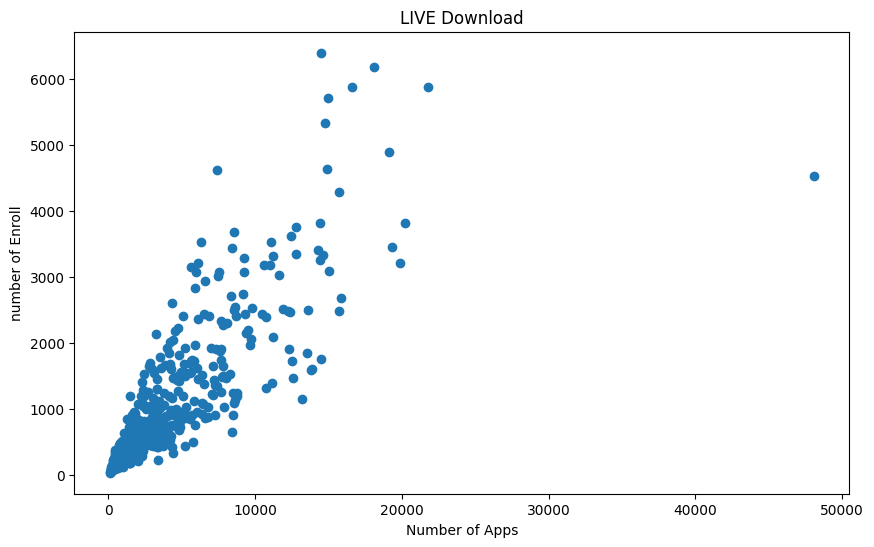

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(df['Apps'],df['Enroll'])
plt.xlabel('Number of Apps')
plt.ylabel('number of Enroll')
plt.title('LIVE Download')

## Declare feature vector and target variable

In [19]:
df.head(2)

,Unnamed: 0,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30


## Convert categorical variable into integers

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Unnamed: 0'] = le.fit_transform(df['Unnamed: 0'])

In [22]:
y=df
cols = y.columns
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
y = ms.fit_transform(y)
y = pd.DataFrame(y, columns=[cols])

In [23]:
X = y.values
X[:5] # Show first 5 records only

array([[0.        , 0.03288693, 0.04417701, 0.10791254, 0.23157895,
        0.47252747, 0.08716353, 0.02454774, 0.26342975, 0.23959647,
        0.15775401, 0.29770992, 0.65263158, 0.71052632],
       [0.00128866, 0.04384229, 0.07053089, 0.07503539, 0.15789474,
        0.21978022, 0.08075165, 0.05614839, 0.51342975, 0.73612863,
        0.29144385, 0.19083969, 0.22105263, 0.07894737],
       [0.00257732, 0.0280549 , 0.03903572, 0.04734938, 0.22105263,
        0.45054945, 0.02847257, 0.00448821, 0.46022727, 0.31052963,
        0.13547237, 0.13969466, 0.47368421, 0.55263158],
       [0.00386598, 0.0069981 , 0.01054917, 0.0160453 , 0.62105263,
        0.87912088, 0.01177628, 0.00283948, 0.54855372, 0.57849937,
        0.15775401, 0.09541985, 0.88421053, 0.96052632],
       [0.00515464, 0.0023327 , 0.00281819, 0.00314614, 0.15789474,
        0.38461538, 0.00349162, 0.03975269, 0.2696281 , 0.36885246,
        0.31372549, 0.19083969, 0.71578947, 0.63157895]])

## Feature Scaling

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kme

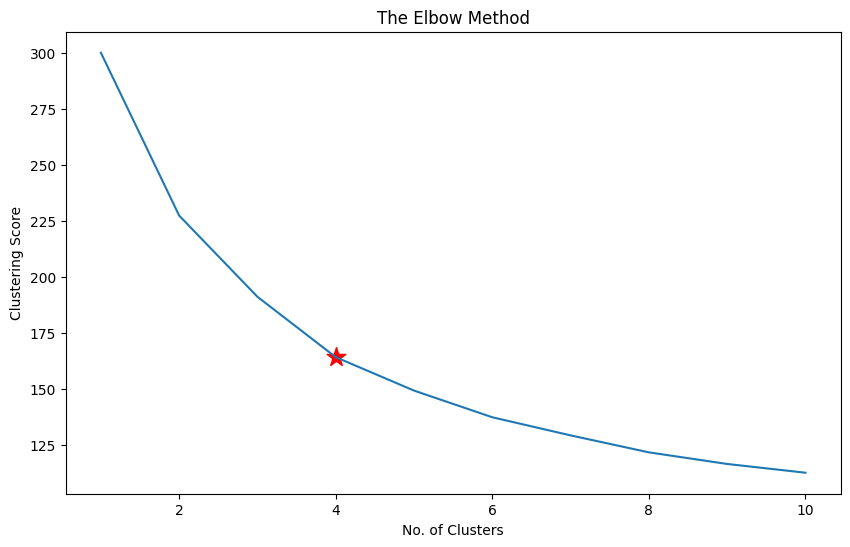

In [25]:
from sklearn.cluster import KMeans
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(4,clustering_score[3], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

## K-Means model with five clusters

In [26]:
kmeans= KMeans(n_clusters = 5, random_state = 42)
# Compute k-means clustering
kmeans.fit(X)
# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)
pred

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 4, 2, 0, 2, 4, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 4, 0, 2, 2, 0,
       0, 0, 0, 4, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 4, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 4, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       4, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0,
       0, 0, 2, 4, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2,
       0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 4, 2, 0, 0, 0, 4, 0, 0, 4, 2, 4, 0, 0, 0, 2, 2, 0,
       0, 2, 4, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0,

In [27]:
df['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', df['Cluster'].value_counts())
df

Number of data points in each cluster= 
 0    226
3    219
2    143
1    111
4     78
Name: Cluster, dtype: int64


,Unnamed: 0,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,Cluster
0,0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,0
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,0
2,2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,0
3,3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,2
4,4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,3
773,773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,3
774,774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,3
775,775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,1


## Vizualization

Text(0.5, 1.0, 'Live selling')

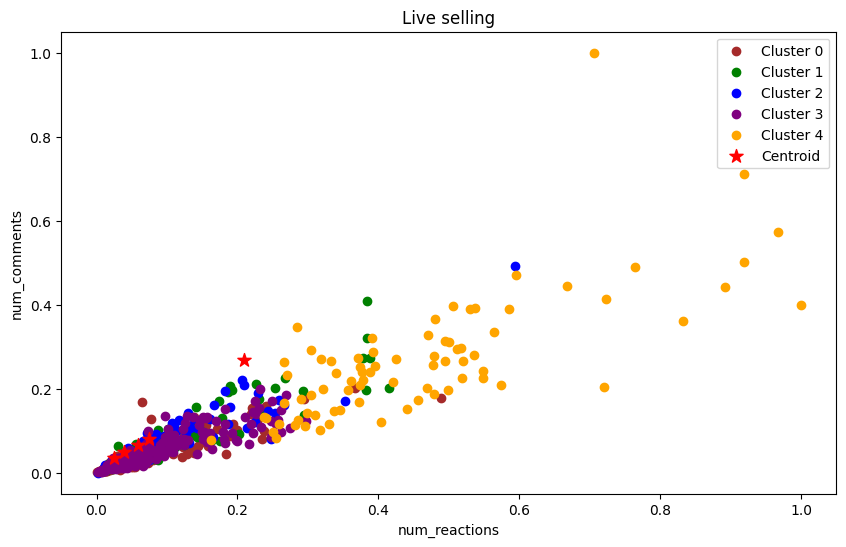

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 3], X[pred == 0, 2], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 3], X[pred == 1, 2], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 3], X[pred == 2, 2], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 3], X[pred == 3, 2], c = 'purple', label = 'Cluster 3')
plt.scatter(X[pred == 4, 3], X[pred == 4, 2], c = 'orange', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:, 2],s =100, c = 'red', label = 'Centroid', marker='*')
plt.xlabel('num_reactions')
plt.ylabel('num_comments')
plt.legend()
plt.title('Live selling')

## K-Means model parameters study

In [29]:
labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_
labels1

array([0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 4, 2, 0, 2, 4, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 4, 0, 2, 2, 0,
       0, 0, 0, 4, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 4, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 4, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       4, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0,
       0, 0, 2, 4, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2,
       0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 4, 2, 0, 0, 0, 4, 0, 0, 4, 2, 4, 0, 0, 0, 2, 2, 0,
       0, 2, 4, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0,

In [30]:
kmeans.inertia_

149.2353098465791